In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Cust_Spend_Data.csv')
data

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [3]:
# data without  and with PII( Personally Identifiable Information)
pdata = data.iloc[:,2:] # rows and columns indexing
idata = data.iloc[:,:2]


In [4]:
# scaling the data because clustering is a weight(distance) based algorithm
scale = StandardScaler()
scaled_data = scale.fit_transform(pdata)

# data after scaling
scaled_df = pd.DataFrame(scaled_data, columns = scale.get_feature_names_out())
scaled_df

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


In [5]:
# Kmeans algo with random clustering
r_kmeans = KMeans(n_clusters = 5, init = 'random',n_init = 'auto', random_state = 42) # random chooses centroids of clusters randomly and n_init = auto is used to control iterations before convergence
rkmeans = r_kmeans.fit_predict(scaled_df)
rkmeans +=1 # start making clusters from 1

# data frame for the predicted cluster
r_cluster = pd.DataFrame(rkmeans)

# concat the cluster with the raw data
pdata['r_cluster'] = r_cluster

pdata

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,r_cluster
0,10000,2,1,1,0,1
1,7000,3,0,10,9,4
2,7000,7,1,3,4,5
3,6500,5,1,1,4,5
4,6000,6,0,12,3,3
5,4000,3,0,1,8,4
6,2500,5,0,11,2,3
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [6]:
# Kmeans algo with random clustering with greedy search
r_kmeans_plus = KMeans(n_clusters = 5, init = 'k-means++',n_init = 'auto', random_state = 42) # k-mens++ uses the greedy approach(mathematical formulation) to find the optimal centroid of clusters
rkmeans_plus = r_kmeans_plus.fit_predict(scaled_df)
rkmeans_plus +=1 # start making clusters from 1

# data frame for the predicted cluster
r_cluster_plus = pd.DataFrame(rkmeans)

# concat the cluster with the raw data
pdata['r_cluster_plus'] = r_cluster_plus

pdata

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,r_cluster,r_cluster_plus
0,10000,2,1,1,0,1,1
1,7000,3,0,10,9,4,4
2,7000,7,1,3,4,5,5
3,6500,5,1,1,4,5,5
4,6000,6,0,12,3,3,3
5,4000,3,0,1,8,4,4
6,2500,5,0,11,2,3,3
7,2500,3,0,1,1,2,2
8,2000,2,0,2,2,2,2
9,1000,4,0,1,7,2,2


In [8]:
# optimum number of cluster
wcss = []
for cluster in range(1,11):
  kmeans = KMeans(n_clusters = cluster, init = 'k-means++',random_state = 42,n_init = 'auto')
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_) #inertia_ :- finds the squared sum of distances of each datapoint to the cluster center

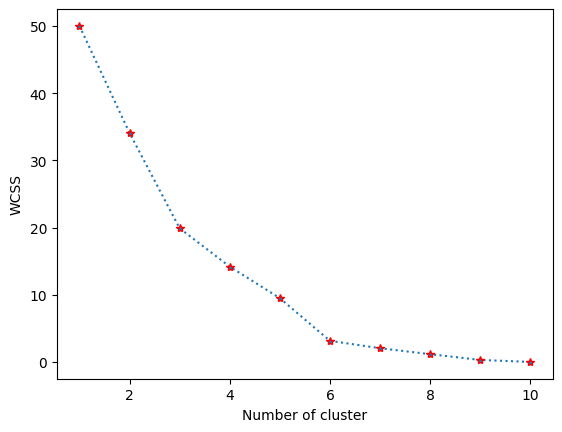

In [9]:
# elbow plot(WCSS plot)
plt.plot(range(1,11),wcss,ls = ':', marker = '*', markeredgecolor = 'red')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [10]:
# final model with optimum number of clusters from WCSS
optimum_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42, n_init = 'auto')
okmeans = optimum_kmeans.fit_predict(scaled_data)
okmeans +=1 #start the cluster from 1 instead of 0

# dataframe for the predicted cluster
optimum_cluster = pd.DataFrame(okmeans)

# concat the cluster with raw data
pdata['optimum_cluster'] = optimum_cluster

pdata

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,r_cluster,r_cluster_plus,optimum_cluster
0,10000,2,1,1,0,1,1,1
1,7000,3,0,10,9,4,4,3
2,7000,7,1,3,4,5,5,1
3,6500,5,1,1,4,5,5,1
4,6000,6,0,12,3,3,3,3
5,4000,3,0,1,8,4,4,2
6,2500,5,0,11,2,3,3,3
7,2500,3,0,1,1,2,2,2
8,2000,2,0,2,2,2,2,2
9,1000,4,0,1,7,2,2,2


In [11]:
# retaining the data with final cluster
pdata.drop(['r_cluster','r_cluster_plus'],axis = 1, inplace = True)

pdata

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,optimum_cluster
0,10000,2,1,1,0,1
1,7000,3,0,10,9,3
2,7000,7,1,3,4,1
3,6500,5,1,1,4,1
4,6000,6,0,12,3,3
5,4000,3,0,1,8,2
6,2500,5,0,11,2,3
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [12]:
# Mean value of each data columns based on clusters
cluster_mean = pd.DataFrame(round(pdata.groupby('optimum_cluster').mean(),1))
cluster_mean_sorted = cluster_mean.sort_values(by = 'Avg_Mthly_Spend',ascending = False)
cluster_mean_sorted

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
optimum_cluster,,,,,
1,7833.3,4.7,1.0,1.7,2.7
3,5166.7,4.7,0.0,11.0,4.7
2,2375.0,3.0,0.0,1.2,4.5


In [13]:
# cluster mapping
cluster_map = {1:'Gold',2:'Bronze',3:'Silver'}
# mapping the columns to the dataframe
pdata['cust_class'] = pdata['optimum_cluster'].map(cluster_map)
pdata

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,optimum_cluster,cust_class
0,10000,2,1,1,0,1,Gold
1,7000,3,0,10,9,3,Silver
2,7000,7,1,3,4,1,Gold
3,6500,5,1,1,4,1,Gold
4,6000,6,0,12,3,3,Silver
5,4000,3,0,1,8,2,Bronze
6,2500,5,0,11,2,3,Silver
7,2500,3,0,1,1,2,Bronze
8,2000,2,0,2,2,2,Bronze
9,1000,4,0,1,7,2,Bronze


In [14]:
# Append the PII data to identify the cutomer to cluster mapping
cust_class_df = pd.concat([idata,pdata],axis = 1)
cust_class_df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,optimum_cluster,cust_class
0,1,A,10000,2,1,1,0,1,Gold
1,2,B,7000,3,0,10,9,3,Silver
2,3,C,7000,7,1,3,4,1,Gold
3,4,D,6500,5,1,1,4,1,Gold
4,5,E,6000,6,0,12,3,3,Silver
5,6,F,4000,3,0,1,8,2,Bronze
6,7,G,2500,5,0,11,2,3,Silver
7,8,H,2500,3,0,1,1,2,Bronze
8,9,I,2000,2,0,2,2,2,Bronze
9,10,J,1000,4,0,1,7,2,Bronze


##Prediction on the new data

In [16]:
# Cluster prediction for a single row data
# input data
new_data = {'Avg_Mthly_Spend': 9000,
            'No_Of_Visits': 5,
            'Apparel_Items': 2,
            'FnV_Items': 7,
            'Staples_Items': 6}

# creating a dataframe for the input data
new_df = pd.DataFrame([new_data])

# preparing the data for the prediction on existing model
# scale the data
new_data_scaled = scale.transform(new_df)
new_data_scaled = pd.DataFrame(new_data_scaled, columns = new_df.columns)

# model prediction
data_pred = optimum_kmeans.predict(new_data_scaled)
data_pred +=1
print(data_pred)

# customer cluster
if data_pred[0]==1:
  print('customer belongs to Gold class')
elif data_pred[0]==3:
  print('customer belongs to siler class')
else:
  print('customer belongs to bronze class')

[1]
customer belongs to Gold class


In [18]:
# cluster prediction for the new data - multiple rows
new_data_multi = {'Avg_Mthly_Spend': [2000, 6000, 3000],
                    'No_Of_Visits': [5, 6, 1],
                    'Apparel_Items': [1, 0, 1],
                    'FnV_Items': [7, 1, 4],
                    'Staples_Items': [6, 0, 0]}

new_data_multi = pd.DataFrame(new_data_multi)

# preparing the data for the prediction on exisiting model
# scale the data
n_data_scaled = scale.transform(new_data_multi)
n_data_scaled = pd.DataFrame(n_data_scaled, columns=new_data_multi.columns)

# model prediction
n_data_pred = optimum_kmeans.predict(n_data_scaled)
n_data_pred += 1     # inorder to start cluster from 1 instead of 0
new_data_multi['optimum_cluster'] = n_data_pred

# mapping
new_data_multi['cust_class'] = new_data_multi['optimum_cluster'].map(cluster_map)
del new_data_multi['optimum_cluster']
new_data_multi

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cust_class
0,2000,5,1,7,6,Silver
1,6000,6,0,1,0,Gold
2,3000,1,1,4,0,Bronze
